<a href="https://colab.research.google.com/github/bele99/Project/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature selection

## 1.Missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### ALL the techniques of handing for missing values
1. Mean/Median/Mode replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### 1) Mean/Median/Mode

In [7]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
print("Find the percentage of null values:", df['cabin_null'].mean())

Find the percentage of null values: 0.7710437710437711


In [8]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [9]:
# use the median mothed for "Age"
df_median = df.Age.median()
df_median

28.0

In [10]:
df['Age_median'] = df['Age'].fillna(df_median)
df[df['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,28.0


In [11]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


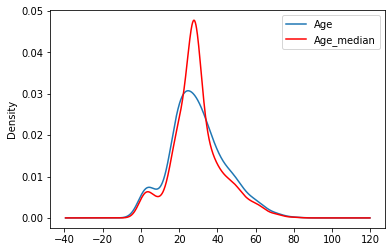

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages And Disadvantages of Mean/Median Imputation**

**Advantages**

* Easy to implement(Robust to outliers)
* Faster way to obtain the complete dataset

**Disadvantages**

* Change or Distortion in the original variance
* Impacts Correlation

### 2) Random sample imputation

In [13]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=1)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [15]:
median=df.Age.median()
impute_nan(df,"Age",median)
df[df['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,28.0,15.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,28.0,7.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,28.0,33.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,28.0,14.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,28.0,21.0


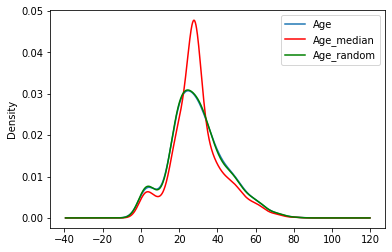

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages**

* Easy To implement
* There is less distortion in variance

**Disadvantage**

* Every situation randomness wont work

### 3) Capturing NAN values with a new feature

In [17]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NAN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0


**Advantages**

* Easy to implement
* Captures the importance of missing values

**Disadvantages**

* Creating Additional Features(Curse of Dimensionality)

### 4) End of distribution imputation

<Axes: >

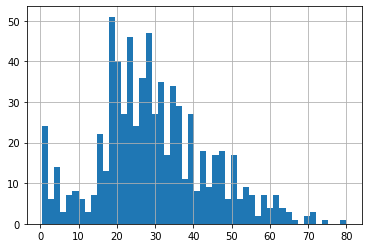

In [18]:
df.Age.hist(bins=50)

<Axes: xlabel='Age'>

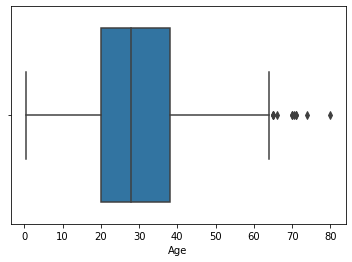

In [19]:
sns.boxplot(x=df['Age'])

In [20]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [21]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [22]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NAN,Age_end_distribution
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0,35.0


<Axes: >

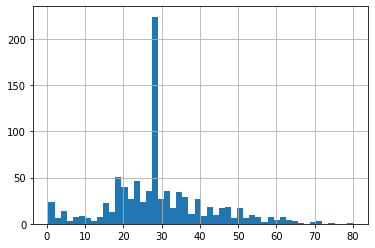

In [23]:
df['Age'].hist(bins=50)

<Axes: >

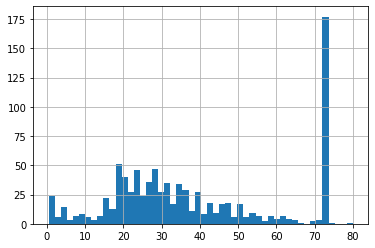

In [24]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

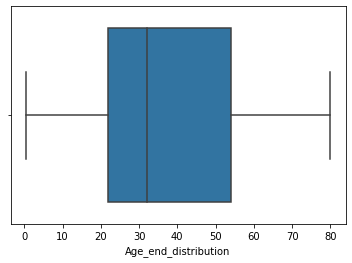

In [25]:
sns.boxplot(x=df['Age_end_distribution'])

**Advantages**

* Easy to implement

**Disadvantages**


### 5) Arbitratry imputation

This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [26]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

impute_nan(df,'Age')

<Axes: >

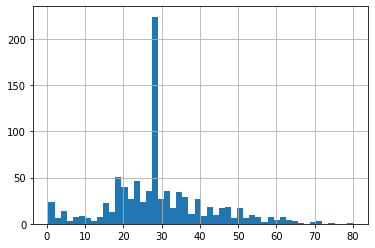

In [31]:
df['Age_hundred'].hist(bins=50)

<Axes: xlabel='Age_hundred'>

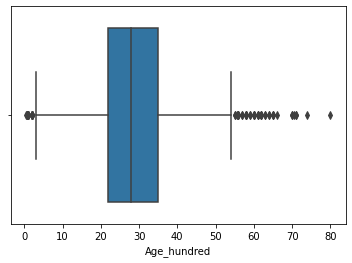

In [30]:
sns.boxplot(x=df['Age_hundred'])

**Advantages**

* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages**

* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

### 6) Handling Categroical missing values

Frequent category imputation

In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NAN,Age_end_distribution,Age_zero,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0,35.0,35.0,35.0


In [33]:
df.isnull().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                   687
Embarked                  2
cabin_null                0
Age_median                0
Age_random                0
Age_NAN                   0
Age_end_distribution      0
Age_zero                  0
Age_hundred               0
dtype: int64

<Axes: >

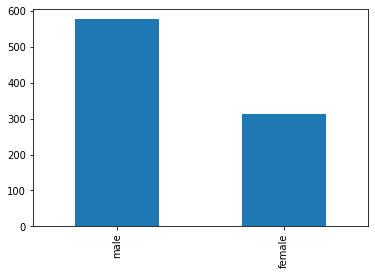

In [37]:
df['Sex'].value_counts().plot.bar()

In [40]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

for feature in ['Sex']:
    impute_nan(df,feature)

**Advantages**

* Easy To implement
* Fater way to implement

**Disadvantages**

* Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
* It distorts the relation of the most frequent label

if you have more frequent categories, we just replace NAN with a new category

In [ ]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable+"newvar"]=np.where(df[variable].isnull(),most_frequent_category,df[variable])

for feature in ['Sex','xxx','zzz']:
    impute_nan(df,feature)

df=df.drop(['Sex','xxx','zzz'],axis=1)

## 2.Handing categorical feature

### 1) One Hot Encoding

In [47]:
df = pd.read_csv('titanic.csv')

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [49]:
pd.get_dummies(df['Sex'],drop_first=True).head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [50]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
pd.get_dummies(df['Embarked'],drop_first=True).head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


?? one hot encoding with many categories in a feature

### 2) ordinal Number Encoding

In [53]:
data_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
data_set.head()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
columns=[1,3,5,6,7,8,9,13]
train_set = data_set[columns]
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [56]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [57]:
# By count
country_map=train_set['Country'].value_counts().to_dict()
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(10)

<ipython-input-57-018bc120aaf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [59]:
ordinal_labels = train_set.Employment.unique()
# You can sort it by counting, frequency, mean

In [62]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [64]:
train_set['Employment_ordinal_labels']=train_set['Employment'].map(ordinal_labels2)
train_set.head()

<ipython-input-64-4a7878f79005>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Employment_ordinal_labels']=train_set['Employment'].map(ordinal_labels2)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country,Employment_ordinal_labels
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170,1
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170,2
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170,2
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95,2


## 3.Handling Datetime

In [65]:
import datetime

In [66]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2023, 3, 22, 2, 26, 35, 833451)

In [67]:
today_date-datetime.timedelta(3)

datetime.datetime(2023, 3, 19, 2, 26, 35, 833451)

In [68]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [69]:
data=pd.DataFrame(days)
data.columns=["Day"]
data.head()

,Day
0,2023-03-22 02:26:35.833451
1,2023-03-21 02:26:35.833451
2,2023-03-20 02:26:35.833451
3,2023-03-19 02:26:35.833451
4,2023-03-18 02:26:35.833451


In [72]:
data['weekday']=data['Day'].dt.weekday
data.head()

,Day,weekday
0,2023-03-22 02:26:35.833451,2
1,2023-03-21 02:26:35.833451,1
2,2023-03-20 02:26:35.833451,0
3,2023-03-19 02:26:35.833451,6
4,2023-03-18 02:26:35.833451,5


In [77]:
dictionary={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dictionary

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [78]:
data['weekday_ordinal']=data['weekday'].map(dictionary)
data.head()

,Day,weekday,weekday_ordinal
0,2023-03-22 02:26:35.833451,2,Wednesday
1,2023-03-21 02:26:35.833451,1,Tuesday
2,2023-03-20 02:26:35.833451,0,Monday
3,2023-03-19 02:26:35.833451,6,Sunday
4,2023-03-18 02:26:35.833451,5,Saturday


## 1. variance threshold

## 2. Correlation

## 3. information Gain for classification

## 4. information Gain for regression

## 5.ChiSquare test statistical analysis